# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [76]:
df_hh_income = pd.read_csv('data\Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('data\Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('data\Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('data\Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('data\Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [77]:
print(f"Shape of df_hh_income: {df_hh_income.shape}")
print(f"Shape of df_pct_poverty: {df_pct_poverty.shape}")
print(f"Shape of df_pct_completed_hs: {df_pct_completed_hs.shape}")
print(f"Shape of df_share_race_city: {df_share_race_city.shape}")
print(f"Shape of df_fatalities: {df_fatalities.shape}")

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [78]:
print(f"NaN values in df_hh_income: {df_hh_income.isna().values.any()}")
print(f"Duplicates in df_hh_income: {df_hh_income.duplicated().values.any()}")

NaN values in df_hh_income: True
Duplicates in df_hh_income: False


In [79]:
print(f"NaN values in df_pct_poverty: {df_pct_poverty.isna().values.any()}")
print(f"Duplicates in df_pct_poverty: {df_pct_poverty.duplicated().values.any()}")

NaN values in df_pct_poverty: False
Duplicates in df_pct_poverty: False


In [80]:
print(f"NaN values in df_pct_completed_hs: {df_pct_completed_hs.isna().values.any()}")
print(f"Duplicates in df_pct_completed_hs: {df_pct_completed_hs.duplicated().values.any()}")

NaN values in df_pct_completed_hs: False
Duplicates in df_pct_completed_hs: False


In [81]:
print(f"NaN values in df_share_race_city: {df_share_race_city.isna().values.any()}")
print(f"Duplicates in df_share_race_city: {df_share_race_city.duplicated().values.any()}")

NaN values in df_share_race_city: False
Duplicates in df_share_race_city: False


In [82]:
print(f"NaN values in df_fatalities: {df_fatalities.isna().values.any()}")
print(f"Duplicates in df_fatalities: {df_fatalities.duplicated().values.any()}")

NaN values in df_fatalities: True
Duplicates in df_fatalities: False


In [83]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [84]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [85]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [86]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [87]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [90]:
df_hh_income['Median Income'].value_counts()

Median Income
(X)      1113
-         740
38750     136
41250     125
43750     115
         ... 
67117       1
90591       1
54853       1
64234       1
39371       1
Name: count, Length: 14592, dtype: int64

In [91]:
df_pct_poverty['poverty_rate'].value_counts()

poverty_rate
0       1464
-        201
6.7      129
7.4      129
10       128
        ... 
44.5       1
68.7       1
74.3       1
77.2       1
83.6       1
Name: count, Length: 771, dtype: int64

In [92]:
df_pct_completed_hs['percent_completed_hs'].value_counts()

percent_completed_hs
100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
24.1       1
4.5        1
33.1       1
15.4       1
43.9       1
Name: count, Length: 728, dtype: int64

In [175]:
df_hh_income.sample(10)

,Geographic Area,City,Median Income
8022,IN,Tennyson town,35833
14343,MO,Oakville CDP,79054
23102,PA,Unionville borough,39500
21195,OR,Coburg city,52679
11106,MD,Finzel CDP,37036
24992,TX,Eugenio Saenz CDP,-
13794,MO,Campbell city,21901
12900,MN,Marietta city,36250
27248,VA,Templeton CDP,22692
18212,NC,Durham city,50420


In [176]:
df_pct_poverty.sample(10)

,Geographic Area,City,poverty_rate
11851,MI,Crystal Mountain CDP,0
27839,WA,Spangle city,28.5
16057,NJ,Harrington Park borough,4.9
8790,IA,Orleans city,3.9
26347,UT,Elk Ridge city,6.8
11816,MI,Centreville village,14.2
21598,PA,Baumstown CDP,0
3886,CO,Walden town,13.4
15635,NV,Blue Diamond CDP,9.9
11876,MI,Eagle village,0


In [177]:
df_pct_completed_hs.sample(10)

,Geographic Area,City,percent_completed_hs
5039,FL,World Golf Village CDP,97.8
18769,NC,Winton town,74.7
14725,MT,Bridger CDP,100
4657,FL,Montura CDP,55
23965,SD,Oglala CDP,81.8
18899,ND,Fessenden city,94.2
17984,NY,Westhampton CDP,95.5
15488,NE,Richfield CDP,100
19811,OH,Mariemont village,99
19564,OH,Genoa village,91.7


In [178]:
df_share_race_city.sample(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
3911,CT,Blue Hills CDP,6.1,87.6,0.2,0.2,5.5
3887,CO,Wellington town,90.5,0.7,1,0.7,13.3
28035,WV,Ghent CDP,97.6,0,0,0.7,0
13507,MS,Pace town,16.4,82.5,0.4,0,0.4
11989,MI,Iron River city,96.3,0.2,1.2,0.3,1.9
8774,IA,Oelwein city,96.1,0.9,0.1,0.6,2.9
25903,TX,Santa Clara city,90.5,1,0.7,0.3,18.8
20713,OK,Lahoma town,93.8,0.2,2.8,0.2,3.3
17055,NY,Cumminsville CDP,97.3,0,0,0.5,0
6477,IL,Forrest village,95.9,0.4,0,0.2,6.1


In [179]:
df_fatalities.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1537,1727,Bernard Wells,23/07/16,shot,gun,31.00,M,B,Chino,CA,False,attack,Foot,False
966,1119,Brandon Barsnick,21/12/15,shot,gun,30.00,M,W,Smartsville,CA,False,attack,Not fleeing,False
1306,1489,Kay Frances Campbell,25/04/16,shot,gun,60.00,F,W,East Flat Rock,NC,True,attack,Not fleeing,False
2336,2599,Shannon Edward Estill,20/05/17,shot,toy weapon,58.00,M,W,Pleasanton,CA,True,attack,Not fleeing,True
1319,1504,Oswald Mattner,30/04/16,shot,knife,42.00,M,W,Wausau,WI,False,other,Not fleeing,False
2351,2616,Joseph Zimmerman,26/05/17,shot,toy weapon,34.00,M,W,Tucson,AZ,True,attack,Not fleeing,False
1160,1330,Mickey Dewayne Sweatt,01/03/16,shot,gun,37.00,M,W,Gautier,MS,False,attack,Not fleeing,False
483,590,Tyler Rogers,06/07/15,shot,gun,20.00,M,W,Oklahoma City,OK,False,attack,Not fleeing,False
1135,1301,Gerardino Cayetano Gonzalez,22/02/16,shot,gun,33.00,M,H,Denver,CO,False,attack,Other,False
1206,1377,Christopher Nelms,17/03/16,shot,gun,30.00,M,B,Houston,TX,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [138]:
# Copying the dataframe to clean it
cleaned_df_hh_income = df_hh_income.copy()
# Replacing '(X)' and '-' with NaN, and replacing '2,500-' with 2500 and '250,000+' with 250000
cleaned_df_hh_income['Median Income'] = cleaned_df_hh_income['Median Income'].replace(
    {'(X)': np.nan,
     '-': np.nan,
     '2,500-': 2500,
     '250,000+': 250000}).astype(float)
# Filling NaN values with the median value
cleaned_df_hh_income['Median Income'] = cleaned_df_hh_income['Median Income'].fillna(cleaned_df_hh_income['Median Income'].median())
# Converting the column to integer
cleaned_df_hh_income['Median Income'] = cleaned_df_hh_income['Median Income'].astype(int)

In [123]:
# Copying the dataframe to clean it
cleaned_df_pct_poverty = df_pct_poverty.copy()
# Replacing '-' with NaN
cleaned_df_pct_poverty['poverty_rate'] = cleaned_df_pct_poverty['poverty_rate'].replace('-', np.nan).astype(float)
# Filling NaN values with the median value
cleaned_df_pct_poverty['poverty_rate'] = cleaned_df_pct_poverty['poverty_rate'].fillna(cleaned_df_pct_poverty['poverty_rate'].median())

In [126]:
# Copying the dataframe to clean it
cleaned_df_pct_completed_hs = df_pct_completed_hs.copy()
# Replacing '-' with NaN
cleaned_df_pct_completed_hs['percent_completed_hs'] = cleaned_df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan).astype(float)
# Filling NaN values with the median value
cleaned_df_pct_completed_hs['percent_completed_hs'] = cleaned_df_pct_completed_hs['percent_completed_hs'].fillna(cleaned_df_pct_completed_hs['percent_completed_hs'].median())

In [136]:
# Copying the dataframe to clean it
cleaned_df_share_race_city = df_share_race_city.copy()
# Replacing (X) with NaN
cleaned_df_share_race_city['share_white'] = cleaned_df_share_race_city['share_white'].replace('(X)', np.nan).astype(float)
cleaned_df_share_race_city['share_black'] = cleaned_df_share_race_city['share_black'].replace('(X)', np.nan).astype(float)
cleaned_df_share_race_city['share_native_american'] = cleaned_df_share_race_city['share_native_american'].replace('(X)', np.nan).astype(float)
cleaned_df_share_race_city['share_asian'] = cleaned_df_share_race_city['share_asian'].replace('(X)', np.nan).astype(float)
cleaned_df_share_race_city['share_hispanic'] = cleaned_df_share_race_city['share_hispanic'].replace('(X)', np.nan).astype(float)
# Replacing NaN with median
cleaned_df_share_race_city['share_white'] = cleaned_df_share_race_city['share_white'].fillna(cleaned_df_share_race_city['share_white'].median())
cleaned_df_share_race_city['share_black'] = cleaned_df_share_race_city['share_black'].fillna(cleaned_df_share_race_city['share_black'].median())
cleaned_df_share_race_city['share_native_american'] = cleaned_df_share_race_city['share_native_american'].fillna(cleaned_df_share_race_city['share_native_american'].median())
cleaned_df_share_race_city['share_asian'] = cleaned_df_share_race_city['share_asian'].fillna(cleaned_df_share_race_city['share_asian'].median())
cleaned_df_share_race_city['share_hispanic'] = cleaned_df_share_race_city['share_hispanic'].fillna(cleaned_df_share_race_city['share_hispanic'].median())

In [171]:
# Removing rows with TK TK in the 'name' column
cleaned_df_fatalities = df_fatalities[df_fatalities['name'] != 'TK TK']
# Removing rows where the race is NaN
cleaned_df_fatalities.drop(index=cleaned_df_fatalities[cleaned_df_fatalities['race'].isna()].index, inplace=True)
# Filling NaN values in the age column with the median value
cleaned_df_fatalities['age'] = cleaned_df_fatalities['age'].fillna(cleaned_df_fatalities['age'].median())
# Converting the date column to datetime
cleaned_df_fatalities['date'] = pd.to_datetime(cleaned_df_fatalities['date'])
# Replacing 'NaN' with 'Other' in the 'flee' column
cleaned_df_fatalities['flee'] = cleaned_df_fatalities['flee'].fillna('Other')
# Replacing 'NaN' with 'unknown weapon' in the 'armed' column
cleaned_df_fatalities['armed'] = cleaned_df_fatalities['armed'].fillna('unknown weapon')

C:\Users\campr\AppData\Local\Temp\ipykernel_20196\3842527882.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\campr\AppData\Local\Temp\ipykernel_20196\3842527882.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\campr\AppData\Local\Temp\ipykernel_20196\3842527882.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\campr\AppData\Local\Temp\ipykernel_20196\3842527882.py:8: SettingWithCopyWarning:

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [188]:
poverty_by_state = cleaned_df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': 'mean'}).reset_index()
poverty_by_state = poverty_by_state.sort_values('poverty_rate', ascending=True)

In [190]:
px.bar(poverty_by_state,
    orientation='h',
    x='poverty_rate',
    y='Geographic Area',
    title='Poverty Rate by State',
    color='poverty_rate',
    color_continuous_scale='Viridis',
    labels={'poverty_rate': 'Average Poverty Rate', 'Geographic Area': 'State'}).show()


Mississippi has the highest poverty rate at just under 27% while New Jersey has the lowest poverty rate at just over 8%

In [246]:
px.choropleth(poverty_by_state,
    locations='Geographic Area',
    locationmode='USA-states',
    color='poverty_rate',
    color_continuous_scale='Viridis',
    title='Poverty Rate by State',
    labels={'poverty_rate': 'Average Poverty Rate', 'Geographic Area': 'State'}).show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [191]:
hs_completion_by_state = cleaned_df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': 'mean'}).reset_index().sort_values('percent_completed_hs', ascending=True)

In [192]:
px.bar(hs_completion_by_state,
    orientation='h',
    x='percent_completed_hs',
    y='Geographic Area',
    title='High School Completion Rate by State',
    color='percent_completed_hs',
    color_continuous_scale='Viridis',
    labels={'percent_completed_hs': 'Average High School Completion Rate', 'Geographic Area': 'State'}).show()

Massachusetts has the highest high school completion rate of just over 93%, while Texas has the lowest at just under 76%

In [247]:
px.choropleth(hs_completion_by_state,
    locations='Geographic Area',
    locationmode='USA-states',
    color='percent_completed_hs',
    color_continuous_scale='Viridis',
    title='High School Completion Rate by State',
    labels={'percent_completed_hs': 'Average High School Completion Rate', 'Geographic Area': 'State'}).show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [197]:
poverty_and_hs_completion_by_state = poverty_by_state.merge(hs_completion_by_state, on='Geographic Area')

In [206]:
px.scatter(poverty_and_hs_completion_by_state,
    x='percent_completed_hs',
    y='poverty_rate',
    title='Poverty Rate vs High School Completion Rate by State',
    color='Geographic Area',
    labels={'poverty_rate': 'Average Poverty Rate', 'percent_completed_hs': 'Average High School Completion Rate'}).show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 1200x600 with 0 Axes>

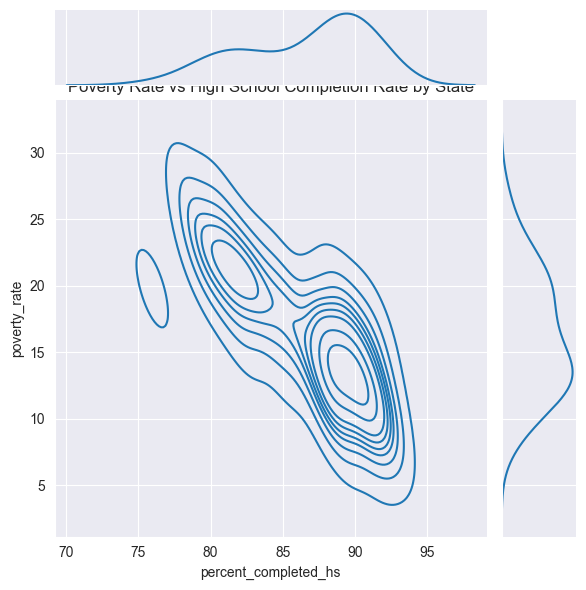

In [207]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 6))
    sns.jointplot(data=poverty_and_hs_completion_by_state, x='percent_completed_hs', y='poverty_rate', kind='kde')
    plt.title('Poverty Rate vs High School Completion Rate by State')
    plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

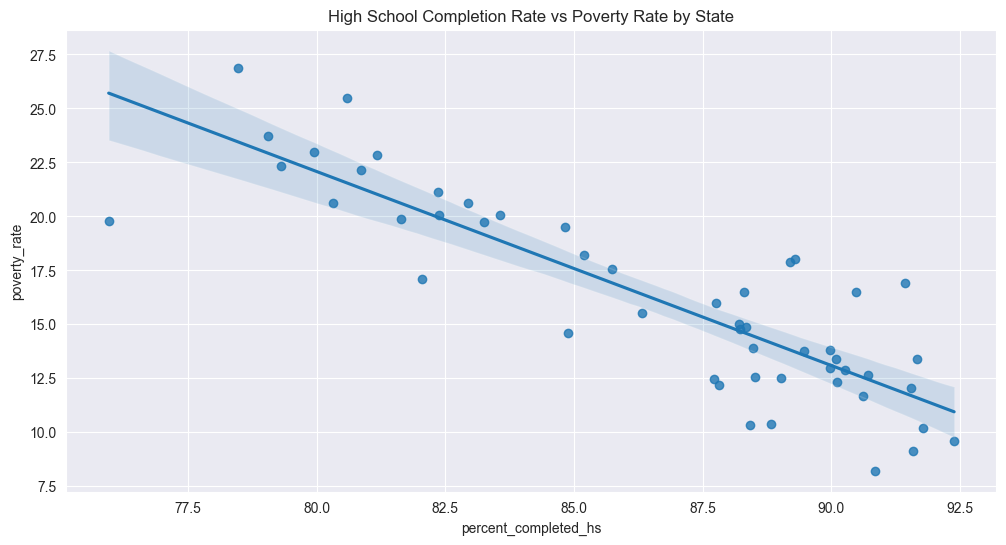

In [205]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 6))
    sns.regplot(data=poverty_and_hs_completion_by_state, x='percent_completed_hs', y='poverty_rate')
    plt.title('High School Completion Rate vs Poverty Rate by State')
    plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [210]:
race_by_state = cleaned_df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'}).reset_index()

In [213]:
px.bar(race_by_state.melt(id_vars='Geographic area'),
    x='Geographic area',
    y='value',
    title='Share of Races by State',
    color='variable',
    color_discrete_sequence=px.colors.qualitative.Set3,
    labels={'value': 'race share', 'Geographic area': 'State'},
    barmode='group').show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [216]:
num_killed_by_race = cleaned_df_fatalities['race'].value_counts().reset_index()

In [219]:
px.pie(num_killed_by_race,
       names='race',
       values='count',
       title='Number of People Killed by Police by Race',
       hole=0.6).show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [222]:
num_killed_by_gender = cleaned_df_fatalities['gender'].value_counts().reset_index()

In [225]:
px.pie(num_killed_by_gender,
       names='gender',
       values='count',
       title='Number of People Killed by Police by Race',
       hole=0.6).show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [228]:
manner_of_death_by_gender = cleaned_df_fatalities.groupby(['manner_of_death', 'gender']).agg({'id': 'count'})
manner_of_death_by_gender['gender'] = manner_of_death_by_gender.index.get_level_values(1)
manner_of_death_by_gender['manner_of_death'] = manner_of_death_by_gender.index.get_level_values(0)
manner_of_death_by_gender.reset_index(drop=True, inplace=True)
manner_of_death_by_gender.rename(columns={'id': 'count'}, inplace=True)

In [233]:
px.bar(manner_of_death_by_gender,
         x='manner_of_death',
         y='count',
         title='Manner of Death by Gender',
         color='gender',
         labels={'count': 'Number of Deaths', 'manner_of_death': 'Manner of Death'},
         barmode='group').show()

manner_of_death
shot                2177
shot and Tasered     158
Name: count, dtype: int64

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [236]:
px.bar(cleaned_df_fatalities['armed'].value_counts().reset_index(),
            x='armed',
            y='count',
            title='Number of People Killed by Police by Weapon',
            labels={'count': 'Number of Deaths', 'armed': 'Weapon'},
            color='count',
            color_continuous_scale='Viridis').show()

In [237]:
pct_armed_with_guns = (cleaned_df_fatalities[cleaned_df_fatalities['armed'] == 'gun'].shape[0] / cleaned_df_fatalities['armed'].shape[0]) * 100
pct_unarmed = (cleaned_df_fatalities[cleaned_df_fatalities['armed'] == 'unarmed'].shape[0] / cleaned_df_fatalities['armed'].shape[0]) * 100

In [238]:
print(f"{pct_armed_with_guns:.2f}% of the people killed by police were armed with guns")
print(f"{pct_unarmed:.2f}% of the people killed by police were unarmed")

55.12% of the people killed by police were armed with guns
7.28% of the people killed by police were unarmed


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [240]:
fatalities_under_25 = cleaned_df_fatalities[cleaned_df_fatalities['age'] < 25]
pct_under_25 = (fatalities_under_25.shape[0] / cleaned_df_fatalities.shape[0]) * 100
print(f"{pct_under_25:.2f}% of the people killed by police were under 25 years old")

18.50% of the people killed by police were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

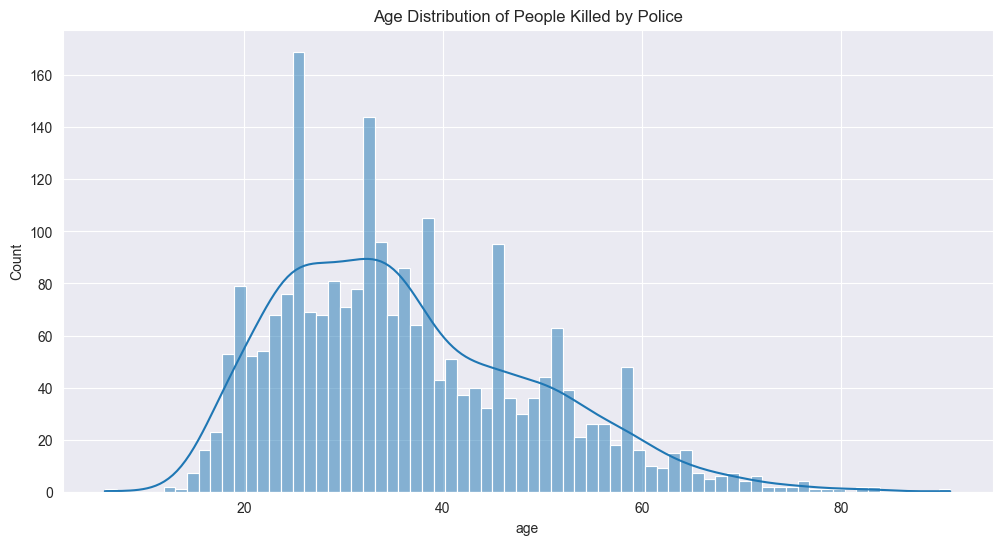

In [244]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=cleaned_df_fatalities, x='age', bins=72, kde=True)
    plt.title('Age Distribution of People Killed by Police')
    plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

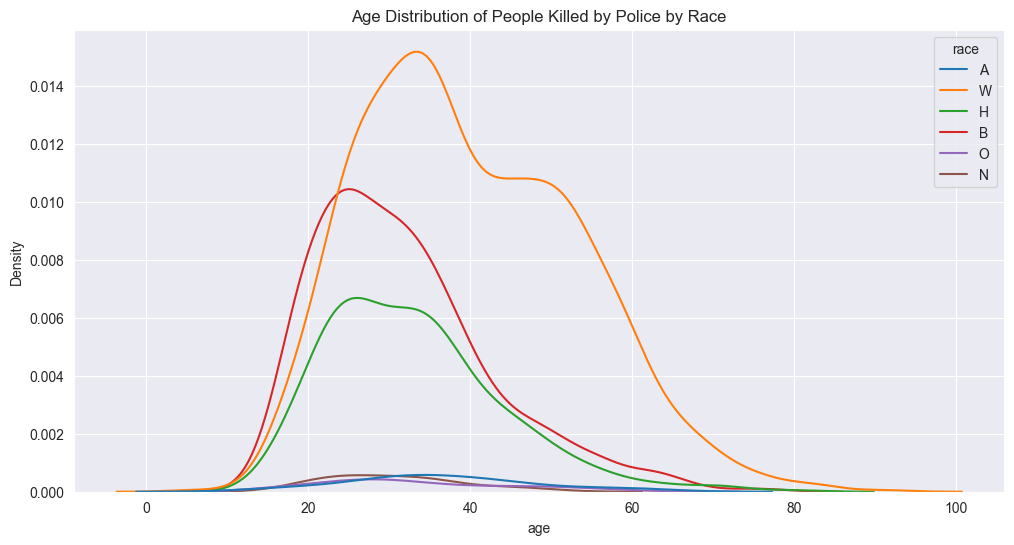

In [248]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=cleaned_df_fatalities, x='age', hue='race')
    plt.title('Age Distribution of People Killed by Police by Race')
    plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [252]:
deaths_by_race = cleaned_df_fatalities.groupby('race').agg({'id': 'count'}).reset_index()
deaths_by_race.rename(columns={'id': 'count'}, inplace=True)
deaths_by_race.sort_values('count', ascending=False, inplace=True)

In [253]:
px.bar(deaths_by_race,
       orientation='h',
       x='count',
       y='race',
       title='Number of People Killed by Police by Race',
       color='race').show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [257]:
deaths_with_mental_illness = cleaned_df_fatalities.groupby('signs_of_mental_illness').agg({'id': 'count'}).reset_index()
deaths_with_mental_illness.rename(columns={'id': 'count'}, inplace=True)

In [258]:
px.pie(deaths_with_mental_illness,
         names='signs_of_mental_illness',
         values='count',
         title='Number of People Killed by Police with Signs of Mental Illness',
         hole=0.6).show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [299]:
deaths_by_city = cleaned_df_fatalities.groupby(['city', 'state']).agg({'id': 'count'})
deaths_by_city['City'] = deaths_by_city.index.get_level_values(0)
deaths_by_city['State'] = deaths_by_city.index.get_level_values(1)
deaths_by_city.reset_index(drop=True, inplace=True)
deaths_by_city.rename(columns={'id': 'Deaths'}, inplace=True)
deaths_by_city.sort_values('Deaths', ascending=False, inplace=True)
top_10_deadliest_cities = deaths_by_city.head(10)

In [301]:
px.bar(top_10_deadliest_cities,
       x='City',
       y='Deaths',
       title='Top 10 Deadliest Cities',
       color='Deaths',
       color_continuous_scale='Viridis',
       labels={'Deaths': 'Number of Deaths', 'City': 'City'}).show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [311]:
top_10_deadliest_cities_names = [f"{city} city" for city in top_10_deadliest_cities['City']]
top_10_deadliest_cities_racial_breakdown = cleaned_df_share_race_city[cleaned_df_share_race_city['City'].isin(top_10_deadliest_cities_names) & cleaned_df_share_race_city['Geographic area'].isin(top_10_deadliest_cities['State'])]
top_10_deadliest_cities_racial_breakdown.reset_index(inplace=True, drop=True)
top_10_deadliest_cities_racial_breakdown.drop(index=[3, 5, 6, 11, 13])

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
1,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
2,FL,Miami city,72.60,19.20,0.30,1.00,70.00
4,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
7,IN,Indianapolis city,62.00,27.30,0.30,2.10,9.40
8,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
9,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
10,TX,Austin city,68.30,8.10,0.90,6.30,35.10
12,TX,Houston city,50.50,23.70,0.70,6.00,43.80
14,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20


In [313]:
px.bar(top_10_deadliest_cities_racial_breakdown.melt(id_vars=['City', 'Geographic area']),
         x='City',
         y='value',
         title='Racial Breakdown of the Top 10 Deadliest Cities',
         color='variable',
         color_discrete_sequence=px.colors.qualitative.Set3,
         labels={'value':'race share', 'City': 'City'},
         barmode='group').show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [314]:
deaths_by_state = cleaned_df_fatalities.groupby('state').agg({'id': 'count'}).reset_index()
deaths_by_state.rename(columns={'id': 'Deaths'}, inplace=True)

In [315]:
px.choropleth(deaths_by_state,
         locations='state',
         locationmode='USA-states',
         color='Deaths',
         color_continuous_scale='Viridis',
         title='Number of Deaths by State',
         labels={'Deaths': 'Number of Deaths', 'state': 'State'}).show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [331]:
deaths_by_month_year = cleaned_df_fatalities.groupby([cleaned_df_fatalities['date'].dt.month, cleaned_df_fatalities['date'].dt.year]).agg({'id': 'count'})
deaths_by_month_year['Month'] = deaths_by_month_year.index.get_level_values(0)
deaths_by_month_year['Year'] = deaths_by_month_year.index.get_level_values(1)
deaths_by_month_year.reset_index(drop=True, inplace=True)
deaths_by_month_year['Date'] = pd.to_datetime(deaths_by_month_year[['Year', 'Month']].assign(DAY=1))
deaths_by_month_year.drop(columns=['Month', 'Year'], inplace=True)
deaths_by_month_year.rename(columns={'id': 'Deaths'}, inplace=True)
deaths_by_month_year = deaths_by_month_year[['Date', 'Deaths']]
deaths_by_month_year.sort_values('Date', inplace=True)

In [333]:
px.line(deaths_by_month_year,
         x='Date',
         y='Deaths',
         title='Number of Deaths by Month and Year').show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).